Necessary imports

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Data Cleanup and setting

In [56]:
df = pd.read_csv('UnlabeledData.csv', na_values=['#N/A', 'N/A', '#N/A N/A'])
for col in df.columns:
    if col != 'Date':
        df[col] = pd.to_numeric(df[col], errors='coerce')


# Drop missing values
df.dropna(inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Remove duplicates
df.drop_duplicates(inplace=True)


Performing EDA

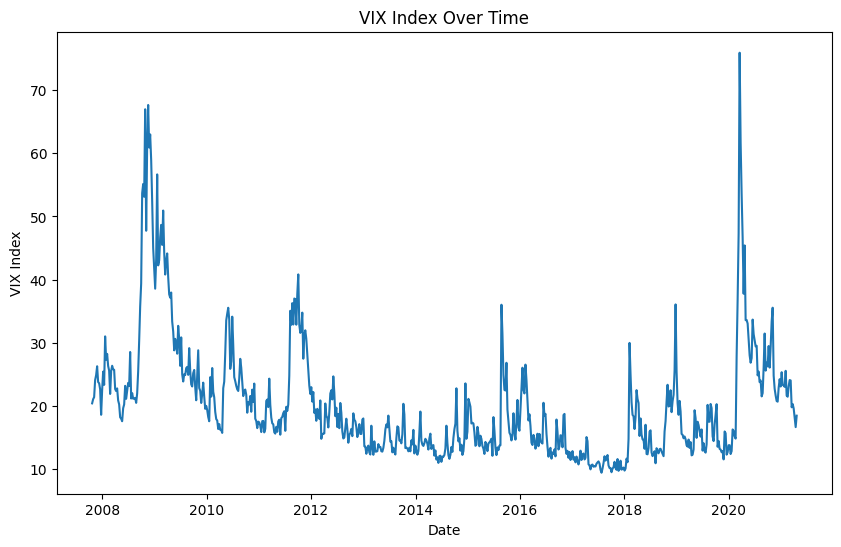

In [57]:
# Plot time series of a selected index
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['VIX Index'])
plt.title('VIX Index Over Time')
plt.xlabel('Date')
plt.ylabel('VIX Index')
plt.show()

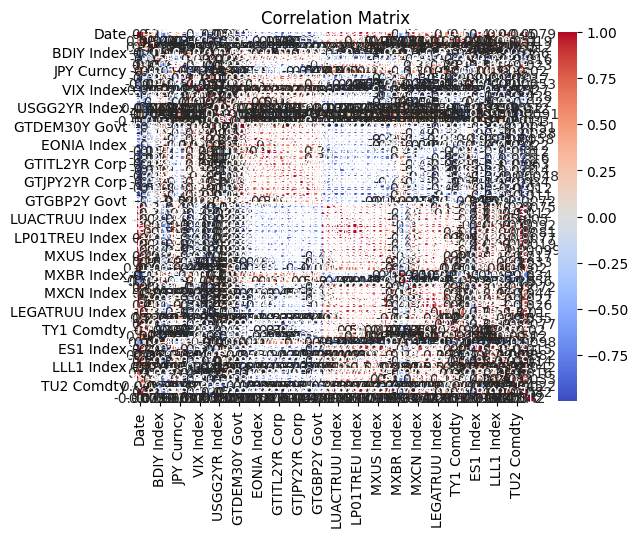

In [58]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [59]:
threshold = 30
df['Crash'] = (df['VIX Index'] > threshold).astype(int)

Performing PCA

Date               0
XAU BGNL Curncy    0
ECSURPUS Index     0
BDIY Index         0
CRY Index          0
                  ..
DU1 Comdty         0
TU2 Comdty         0
Year               0
Month              0
Crash              0
Length: 61, dtype: int64
Number of components after PCA: 7


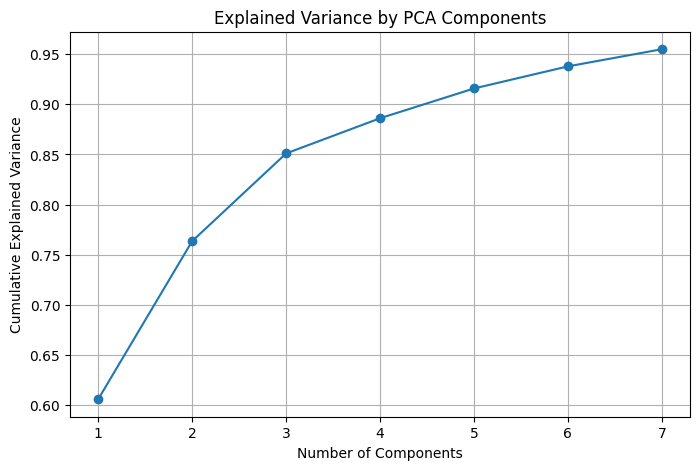

In [60]:
features = df.drop(['Crash','Date'], axis=1)


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

print(df.isna().sum())

pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components after PCA: {pca.n_components_}")

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

Exporting as CSV

In [61]:
# Create a DataFrame for the PCA-transformed data
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Add the target variable ('Crash') back to the PCA-transformed data
df_pca['Crash'] = df['Crash'].values

# Save the preprocessed data to a CSV file
df_pca.to_csv('cleaned_unlabeled_data.csv', index=False)